# **Introduction**

This dataset contains detailed information on 7,134 used cars listed on CarDekho, one of India’s leading car trading platforms. It provides technical specifications, ownership details, and selling prices.
Let's explore this data and predict the final car price. This notebook consists of EDA+ML. Consider upvoting if you find this notebook useful.

# **Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import make_pipeline

# **Load the dataset**

In [2]:
car_data=pd.read_csv('/kaggle/input/used-car-price-prediction/car_prices.csv')
car_data.sample(5)

,Fuel_Type,Body_Type,Kilometers_Driven,Registration_Year,Car_Model,Ownership,Features,Engine_Power,Mileage,Car_Link,Price,City,transmission,color,price
5877,Diesel,Hatchback,80000,2014,Fiat Avventura,First Owner,"Power Steering, Power Windows Front, Air Condi...",138,17.32,https://www.cardekho.com/used-car-details/used...,2375000,jaipur,Manual,Others,600000
292,Diesel,MUV,150000,2013,Toyota Innova,First Owner,"Power Steering, Power Windows Front, Air Condi...",170,17.90,https://www.cardekho.com/used-car-details/used...,2750000,bangalore,Manual,Others,455000
5410,Petrol,Hatchback,51088,2012,Nissan Micra Active,First Owner,"Power Steering, Power Windows Front, Air Condi...",74,25.20,https://www.cardekho.com/used-car-details/used...,320000,jaipur,Manual,Brick Red,325000
1621,Petrol,Sedan,113231,2011,Volkswagen Jetta,Second Owner,"Power Steering, Power Windows Front, Air Condi...",81,18.90,https://www.cardekho.com/buy-used-car-details/...,560000,chennai,Manual,White,643000
432,Petrol,Hatchback,33040,2013,Hyundai i20,First Owner,"Power Steering, Power Windows Front, Air Condi...",78,17.71,https://www.cardekho.com/buy-used-car-details/...,442000,bangalore,Manual,White,799000


In [3]:
car_data.columns

Index(['Fuel_Type', 'Body_Type', 'Kilometers_Driven', 'Registration_Year',
       'Car_Model', 'Ownership', 'Features', 'Engine_Power', 'Mileage',
       'Car_Link', 'Price', 'City', 'transmission', 'color', 'price'],
      dtype='object')

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7134 entries, 0 to 7133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          7134 non-null   object 
 1   Body_Type          7134 non-null   object 
 2   Kilometers_Driven  7134 non-null   int64  
 3   Registration_Year  7134 non-null   int64  
 4   Car_Model          7134 non-null   object 
 5   Ownership          7134 non-null   object 
 6   Features           7134 non-null   object 
 7   Engine_Power       7134 non-null   int64  
 8   Mileage            6126 non-null   float64
 9   Car_Link           7134 non-null   object 
 10  Price              7134 non-null   int64  
 11  City               7134 non-null   object 
 12  transmission       7134 non-null   object 
 13  color              7134 non-null   object 
 14  price              7134 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 836.1+ KB


In [5]:
car_data.describe()

,Kilometers_Driven,Registration_Year,Engine_Power,Mileage,Price,price
count,7134.000000,7134.000000,7134.000000,6126.000000,7.134000e+03,7.134000e+03
mean,58133.784833,2010.289739,106.068124,19.249596,9.993813e+05,6.402747e+05
std,32527.678666,3.801025,46.886123,3.667838,1.474257e+06,3.546521e+05
min,0.000000,1991.000000,25.000000,7.000000,2.016100e+04,2.016100e+04
25%,32101.500000,2008.000000,80.000000,17.050000,4.150000e+05,3.892500e+05
50%,55000.000000,2012.000000,88.000000,18.900000,6.250000e+05,5.700000e+05
75%,80000.000000,2013.000000,120.000000,21.430000,9.820000e+05,8.060000e+05
max,154931.000000,2015.000000,576.000000,35.600000,4.150000e+07,1.775000e+06


Let's see the missing value count

In [6]:
car_data.isna().sum()

Fuel_Type               0
Body_Type               0
Kilometers_Driven       0
Registration_Year       0
Car_Model               0
Ownership               0
Features                0
Engine_Power            0
Mileage              1008
Car_Link                0
Price                   0
City                    0
transmission            0
color                   0
price                   0
dtype: int64

Let's see if there are any duplicates in the data

In [7]:
car_data.duplicated().sum()

0

We can see there are two price columns, let's keep the first one. We don't need the car link, features column as well, so let's drop it

In [8]:
car_data=car_data.drop(['price','Car_Link','Features'],axis=1)
car_data.shape

(7134, 12)

# **Exploratory Data Analysis**

In [9]:
data=car_data.copy()

Let's divide the columns into numerical columns and categorical columns

In [10]:
num_cols=data.select_dtypes(include=['int64','float64']).columns
cat_cols=data.select_dtypes(include='object').columns

In [11]:
num_cols

Index(['Kilometers_Driven', 'Registration_Year', 'Engine_Power', 'Mileage',
       'Price'],
      dtype='object')

In [12]:
cat_cols

Index(['Fuel_Type', 'Body_Type', 'Car_Model', 'Ownership', 'City',
       'transmission', 'color'],
      dtype='object')

Let's see the distribution of numerical columns

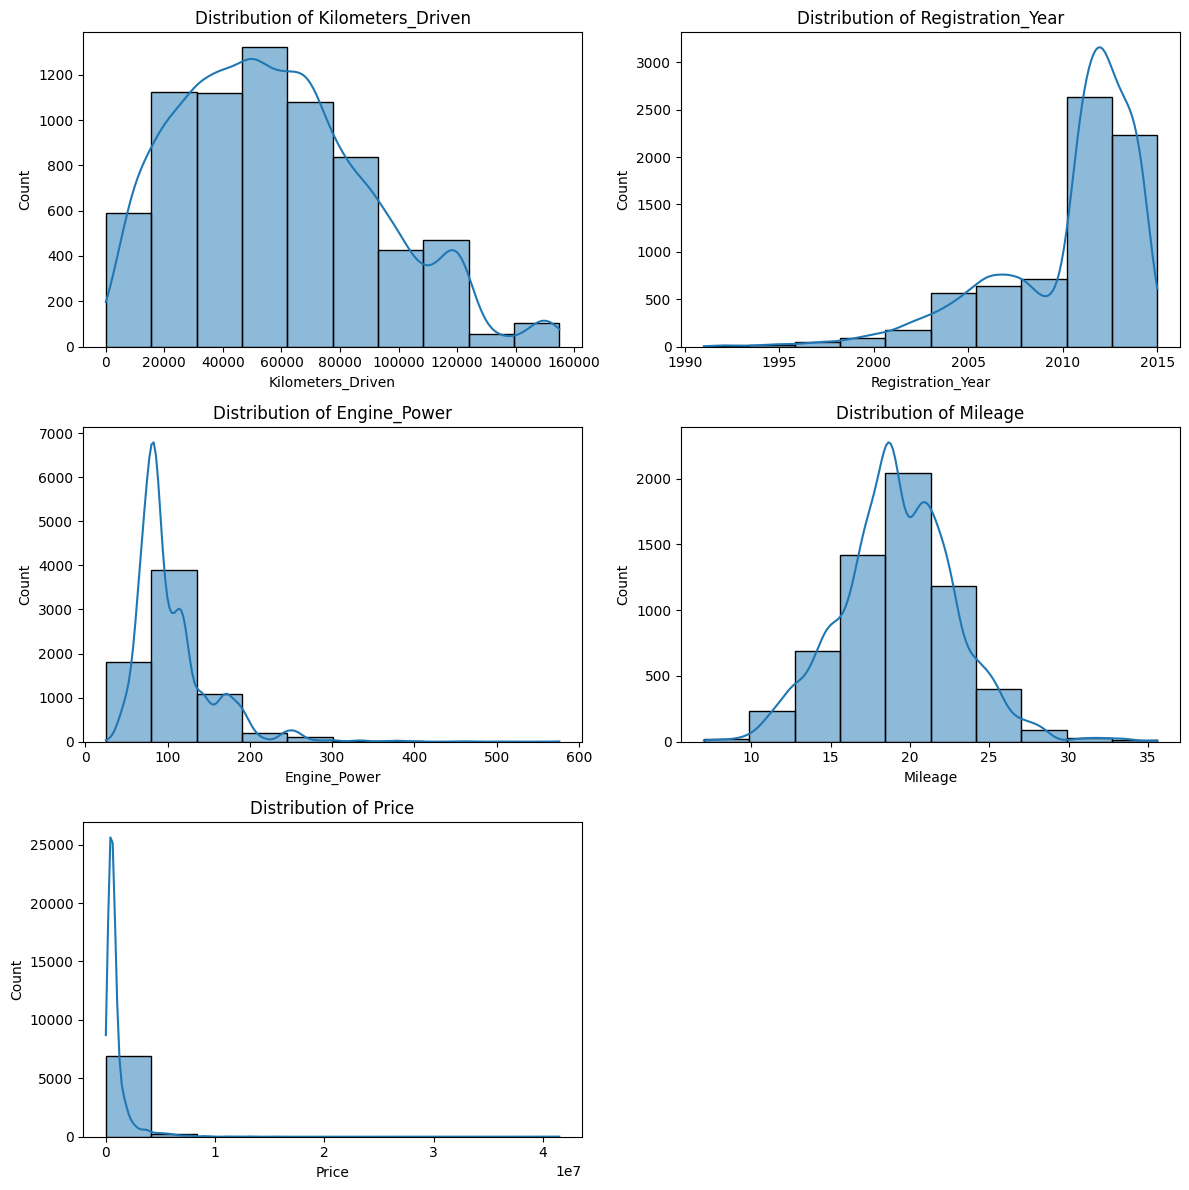

In [13]:
no_of_plots=2
no_of_rows=(len(num_cols)+1)//no_of_plots

plt.figure(figsize=(12,4*no_of_rows))

for i,col in enumerate(num_cols):
    subplot_index=i+1
    plt.subplot(no_of_rows,no_of_plots,subplot_index)
    sns.histplot(data[col],bins=10,kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Let's see the value_counts & distribution of categorical columns

In [14]:
for col in cat_cols:
    print(f"Value counts of {col}")
    print(data[col].value_counts())

Value counts of Fuel_Type
Fuel_Type
Petrol      5060
Diesel      1943
Cng           94
Electric      21
Lpg           16
Name: count, dtype: int64
Value counts of Body_Type
Body_Type
Hatchback        3395
Sedan            1776
SUV              1661
MUV               273
Minivans           20
Pickup Trucks       6
Coupe               1
Wagon               1
Convertibles        1
Name: count, dtype: int64
Value counts of Car_Model
Car_Model
Honda City            358
Maruti Swift          335
Hyundai i20           321
Maruti Baleno         291
Hyundai Grand i10     257
                     ... 
MG Comet EV             1
Isuzu MU 7              1
Mahindra Scorpio N      1
Maruti Ertiga Tour      1
Tata Sumo               1
Name: count, Length: 232, dtype: int64
Value counts of Ownership
Ownership
First Owner     5125
Second Owner    1675
Third Owner      278
Fourth Owner      44
Fifth Owner       12
Name: count, dtype: int64
Value counts of City
City
hyderabad    1298
bangalore    1237
kol

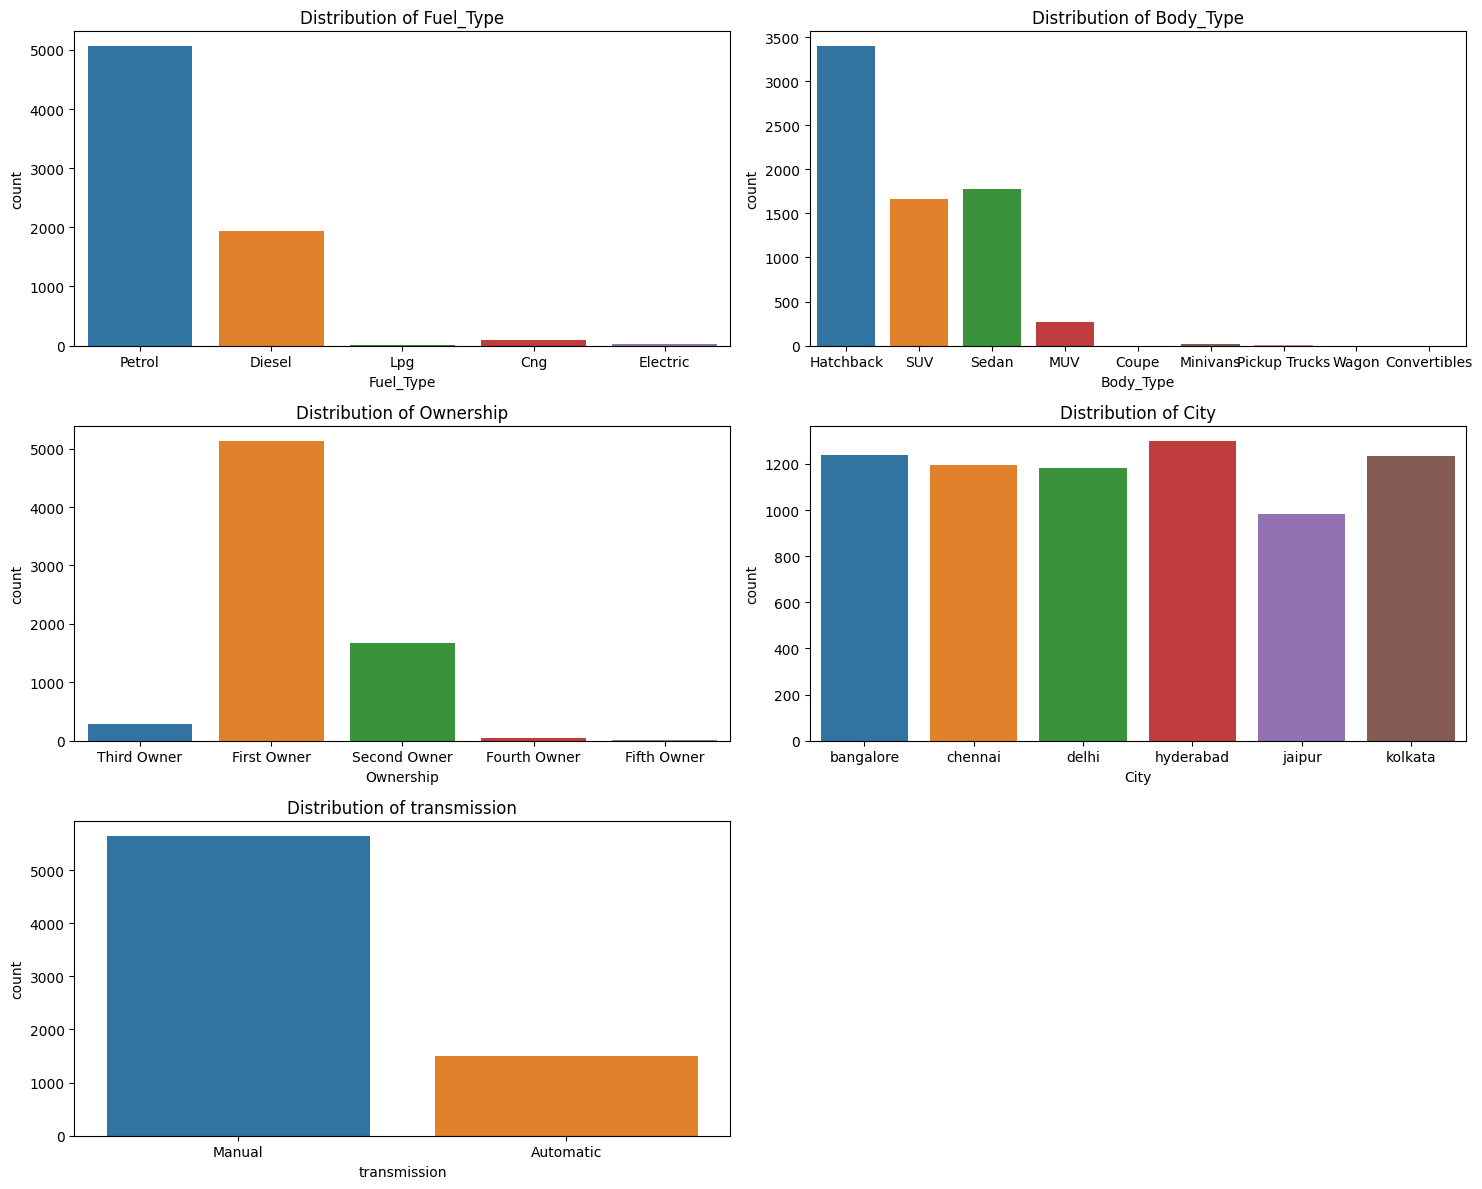

In [15]:
selected_cat_cols=['Fuel_Type','Body_Type','Ownership','City','transmission']
no_of_plots=2
no_of_rows=(len(selected_cat_cols)+1)//no_of_plots

plt.figure(figsize=(15,4*no_of_rows))

for i,col in enumerate(selected_cat_cols):
    subplot_index=i+1
    plt.subplot(no_of_rows,no_of_plots,subplot_index)
    sns.countplot(data=data,x=col)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Let's see the relationship btw  fuel type and price

Text(0.5, 1.0, 'Price by fuel type')

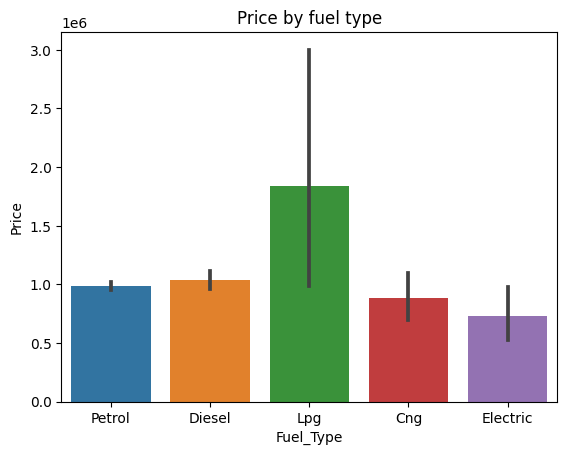

In [16]:
sns.barplot(data=data,x='Fuel_Type',y='Price')
plt.title("Price by fuel type")

Let's see the relationship btw body type and price

Text(0.5, 1.0, 'Price by car body type')

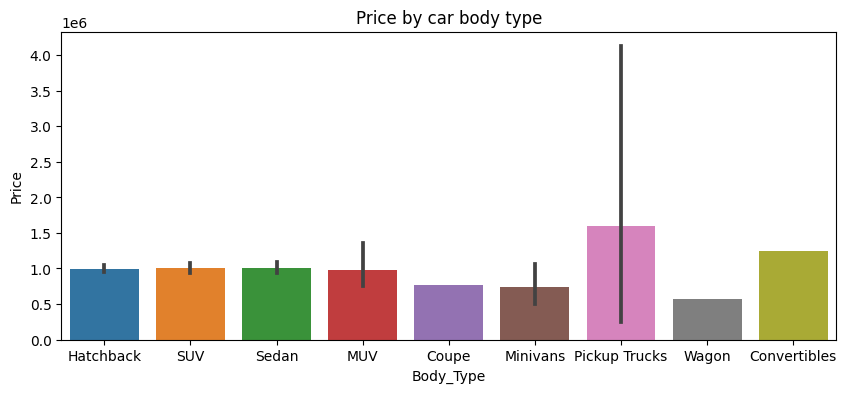

In [17]:
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Body_Type',y='Price')
plt.title("Price by car body type")

Relationship btw kms driven and price

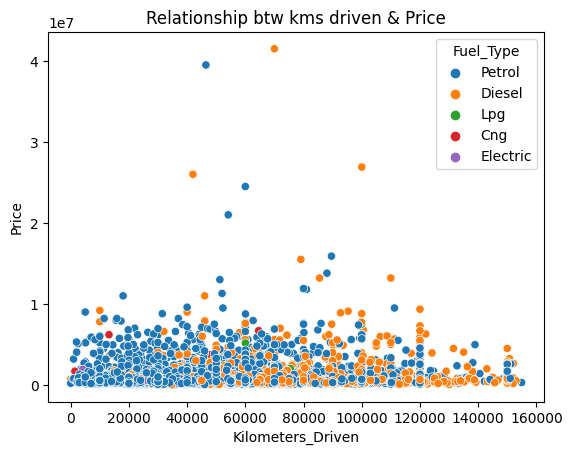

In [18]:
sns.scatterplot(data=data,x='Kilometers_Driven',y='Price',hue='Fuel_Type')
plt.title("Relationship btw kms driven & Price")
plt.show()

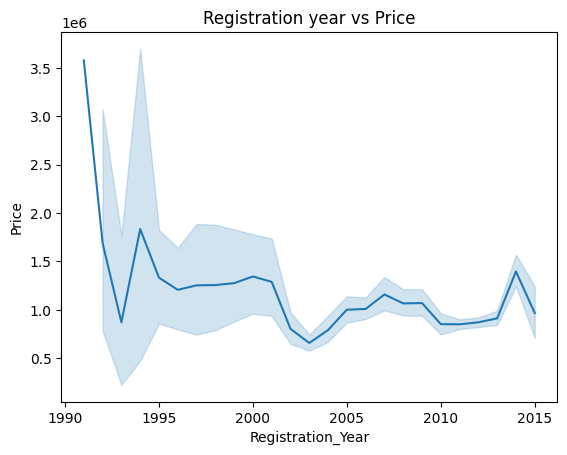

In [19]:
sns.lineplot(data=data,x='Registration_Year',y='Price')
plt.title("Registration year vs Price")
plt.show()

Text(0.5, 1.0, 'Engine power vs Price')

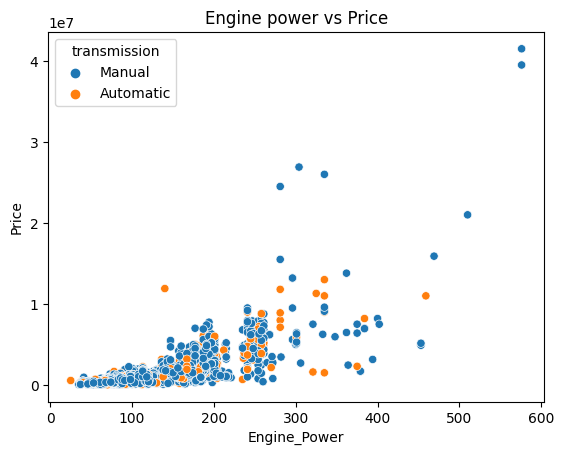

In [20]:
sns.scatterplot(data=data,x='Engine_Power',y='Price',hue='transmission')
plt.title("Engine power vs Price")

Text(0.5, 1.0, 'Price by City')

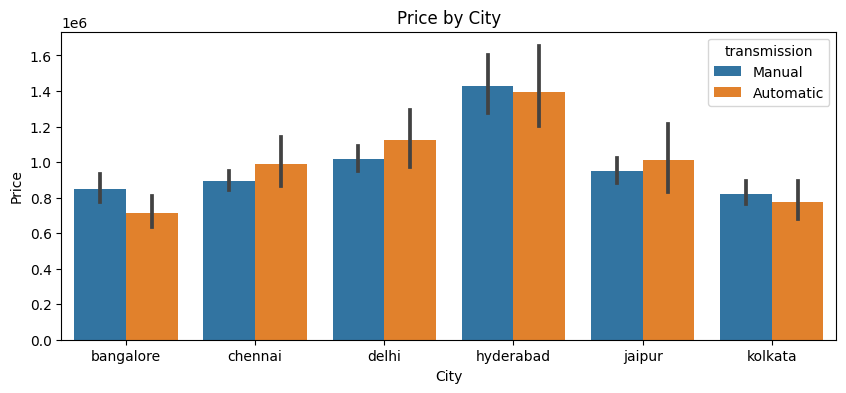

In [21]:
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='City',y='Price',hue='transmission')
plt.title("Price by City")

Let's check for outliers in the numerical columns.

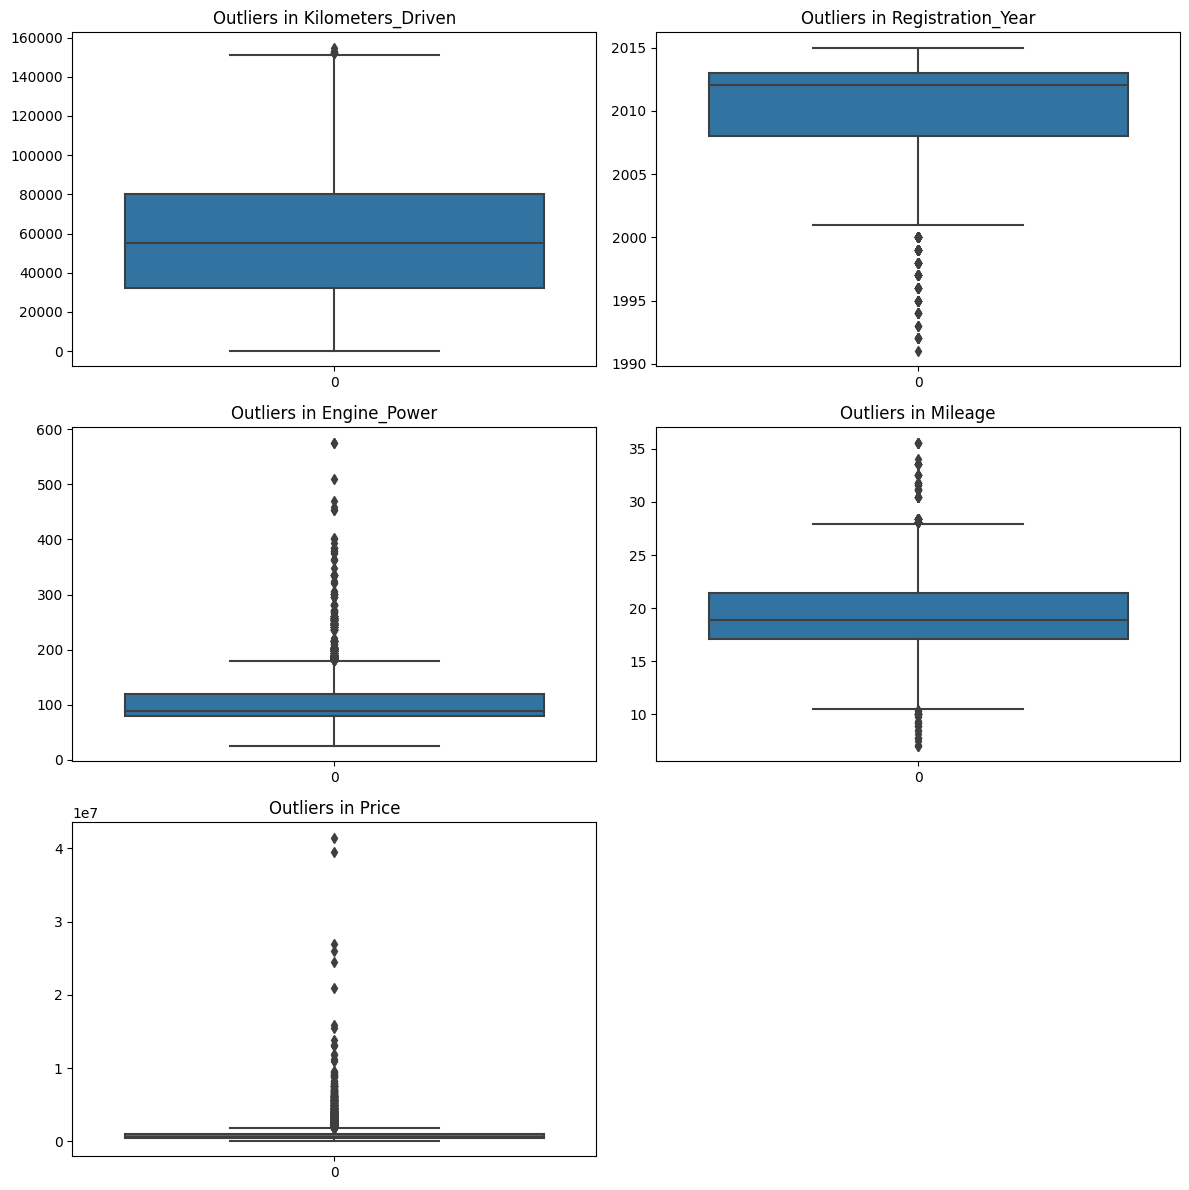

In [22]:
no_of_plots=2
no_of_rows=(len(num_cols)+1)//no_of_plots

plt.figure(figsize=(12,4*no_of_rows))

for i,col in enumerate(num_cols):
    subplot_index=i+1
    plt.subplot(no_of_rows,no_of_plots,subplot_index)
    sns.boxplot(data[col])
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

# **Insights from EDA**

**Key Insights from Exploratory Data Analysis (EDA):**

**Price Drivers**: Electric Vehicle (EV) and Automatic Transmission models tend to command higher prices.

**Temporal Feature**: The 'Registration Year' can be transformed into a more informative 'Age of Car' feature, potentially improving model performance.

**High Cardinality Categorical Features**: Columns like 'Car Model,' and 'Color' exhibit a large number of unique categories. This high cardinality needs to be addressed through feature engineering.


# **Plan for data preprocessing**

1. **Feature Engineering:**
Create an 'Age of Car' feature derived from the 'Registration Year'.
Reduce the number of categories in high-cardinality categorical features.
2. **Data Cleaning:**
Handle missing values using appropriate imputation or removal strategies.
3. **Data Transformation:**
Encode categorical features into numerical representations.
4. **Feature Scaling:**
Scale the features using StandardScaler.

# **Feature Engineering**

In [23]:
q1=data['Mileage'].quantile(0.25)
q3=data['Mileage'].quantile(0.75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
data['Mileage']=np.where(data['Mileage']<lb,lb,np.where(data['Mileage']>ub,ub,data['Mileage']))

In [24]:
q1=data['Kilometers_Driven'].quantile(0.25)
q3=data['Kilometers_Driven'].quantile(0.75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
data['Kilometers_Driven']=np.where(data['Kilometers_Driven']<lb,lb,np.where(data['Kilometers_Driven']>ub,ub,data['Kilometers_Driven']))

In [25]:
q1=data['Engine_Power'].quantile(0.25)
q3=data['Engine_Power'].quantile(0.75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
data['Engine_Power']=np.where(data['Engine_Power']<lb,lb,np.where(data['Engine_Power']>ub,ub,data['Engine_Power']))

In [26]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
data['Price']=np.where(data['Price']<lb,lb,np.where(data['Price']>ub,ub,data['Price']))

**Creating Age fetaure**

In [27]:
data['Age of Car']=2025-data['Registration_Year']
data.drop('Registration_Year',axis=1,inplace=True)
data.shape

(7134, 12)

In [28]:
q1=data['Age of Car'].quantile(0.25)
q3=data['Age of Car'].quantile(0.75)
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
data['Age of Car']=np.where(data['Age of Car']<lb,lb,np.where(data['Age of Car']>ub,ub,data['Age of Car']))

**Reducing the cardinality for Car Model**

In [29]:
counts=data['Car_Model'].value_counts()

In [30]:
frequent_models=counts[counts>250].index
frequent_models

Index(['Honda City', 'Maruti Swift', 'Hyundai i20', 'Maruti Baleno',
       'Hyundai Grand i10'],
      dtype='object', name='Car_Model')

In [31]:
data['Car_Model']=np.where(data['Car_Model'].isin(frequent_models),data['Car_Model'],'Others')
data['Car_Model'].value_counts()

Car_Model
Others               5572
Honda City            358
Maruti Swift          335
Hyundai i20           321
Maruti Baleno         291
Hyundai Grand i10     257
Name: count, dtype: int64

**Reducing the cardinality of Color**

In [32]:
counts=data['color'].value_counts()
counts

color
Others             1916
White              1315
Silver             1156
Red                 745
Blue                488
                   ... 
Arizona Blue          1
Cirrus White          1
Cherry                1
Falsa Colour          1
Out Back Bronze       1
Name: count, Length: 139, dtype: int64

In [33]:
freq_colors=counts[counts>500].index
freq_colors

Index(['Others', 'White', 'Silver', 'Red'], dtype='object', name='color')

In [34]:
data['color']=np.where(data['color'].isin(freq_colors),data['color'],'Rare')
data['color'].value_counts()

color
Rare      2002
Others    1916
White     1315
Silver    1156
Red        745
Name: count, dtype: int64

# **Handling Missing Values**

Let's look at the percentage of missingness in Mileage column

In [35]:
missing_percentage=(data['Mileage'].isna().sum())*100/len(data)
missing_percentage

14.129520605550884

Since the % of missingness higher than 5%, let's use KNN Imputer

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('Price',axis=1),data['Price'],test_size=0.3,random_state=42)

In [37]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5)
X_train['Mileage']=knn.fit_transform(X_train[['Mileage']])
X_test['Mileage']=knn.transform(X_test[['Mileage']])

In [38]:
X_train.isna().sum()

Fuel_Type            0
Body_Type            0
Kilometers_Driven    0
Car_Model            0
Ownership            0
Engine_Power         0
Mileage              0
City                 0
transmission         0
color                0
Age of Car           0
dtype: int64

In [39]:
X_test.isna().sum()

Fuel_Type            0
Body_Type            0
Kilometers_Driven    0
Car_Model            0
Ownership            0
Engine_Power         0
Mileage              0
City                 0
transmission         0
color                0
Age of Car           0
dtype: int64

# **Encoding Categorical Variables**

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
ct=ColumnTransformer([
    ('oridnal',OrdinalEncoder(categories=[['Fifth Owner','Fourth Owner','Third Owner','Second Owner','First Owner']]),['Ownership']),
    ('onehot',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),['Fuel_Type','Body_Type','Car_Model','City','transmission','color']),
],remainder='passthrough')

In [41]:
ct.fit(X_train)
xtrain_transformed=ct.transform(X_train)
xtest_transformed=ct.transform(X_test)

In [42]:
X_train=pd.DataFrame(xtrain_transformed,columns=ct.get_feature_names_out())
X_test=pd.DataFrame(xtest_transformed,columns=ct.get_feature_names_out())

In [43]:
X_train.sample(5)

,oridnal__Ownership,onehot__Fuel_Type_Diesel,onehot__Fuel_Type_Electric,onehot__Fuel_Type_Lpg,onehot__Fuel_Type_Petrol,onehot__Body_Type_Coupe,onehot__Body_Type_Hatchback,onehot__Body_Type_MUV,onehot__Body_Type_Minivans,onehot__Body_Type_Pickup Trucks,...,onehot__City_kolkata,onehot__transmission_Manual,onehot__color_Rare,onehot__color_Red,onehot__color_Silver,onehot__color_White,remainder__Kilometers_Driven,remainder__Engine_Power,remainder__Mileage,remainder__Age of Car
1316,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,47000.0,82.0,18.500000,13.0
1811,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,58177.0,120.0,15.400000,11.0
4826,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,80000.0,120.0,15.400000,13.0
620,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,16452.0,121.0,15.290000,17.0
4519,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,30000.0,121.0,19.177017,14.0


In [44]:
X_train.columns

Index(['oridnal__Ownership', 'onehot__Fuel_Type_Diesel',
       'onehot__Fuel_Type_Electric', 'onehot__Fuel_Type_Lpg',
       'onehot__Fuel_Type_Petrol', 'onehot__Body_Type_Coupe',
       'onehot__Body_Type_Hatchback', 'onehot__Body_Type_MUV',
       'onehot__Body_Type_Minivans', 'onehot__Body_Type_Pickup Trucks',
       'onehot__Body_Type_SUV', 'onehot__Body_Type_Sedan',
       'onehot__Car_Model_Hyundai Grand i10', 'onehot__Car_Model_Hyundai i20',
       'onehot__Car_Model_Maruti Baleno', 'onehot__Car_Model_Maruti Swift',
       'onehot__Car_Model_Others', 'onehot__City_chennai',
       'onehot__City_delhi', 'onehot__City_hyderabad', 'onehot__City_jaipur',
       'onehot__City_kolkata', 'onehot__transmission_Manual',
       'onehot__color_Rare', 'onehot__color_Red', 'onehot__color_Silver',
       'onehot__color_White', 'remainder__Kilometers_Driven',
       'remainder__Engine_Power', 'remainder__Mileage',
       'remainder__Age of Car'],
      dtype='object')

# **Feature Scaling**

In [45]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [46]:
X_train=pd.DataFrame(X_train_ss,columns=X_train.columns)
X_test=pd.DataFrame(X_test_ss,columns=X_test.columns)

# **Prediction**

In [47]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
rf_model = RandomForestRegressor(random_state=42)
lasso_model = Lasso(alpha=1.0, random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

In [48]:
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
r2_rf=r2_score(y_test,y_pred_rf)
print(r2_rf)

0.8278444593166049


In [49]:
lasso_model.fit(X_train,y_train)
y_pred_lasso=lasso_model.predict(X_test)
r2_lasso=r2_score(y_test,y_pred_lasso)
print(r2_lasso)

0.7138903836470332


In [50]:
gb_model.fit(X_train,y_train)
y_pred_gb=gb_model.predict(X_test)
r2_gb=r2_score(y_test,y_pred_gb)
print(r2_gb)

0.7972773308061673
